# When is the most profitable time of the year to launch movies?

We all know that movies are not launch randomly at any time of the year without an strategy to justify it. There is always a market study done tied to a certain number of variables. With the data that we have, that market analysis is not possible, however we can use these numbers to try to filter the seasons and months according to profit and get an idea on when we should be getting the best profit. 

The profit is not available on our data but we have enough input to easily calculate it. 

This database has a rather large number of movies, but we will concentrate on the top 4000. There is no particular reason for this. This is just a number which we believe represents a good sample to give us trends that should illustrate when the top 4000 movies in terms of reviews, have given the best profits.

The results of this question should be the season(s) to focus on with specific months, and the time of the year (months or seasons) to avoid. 

To start with the analysis the first step as always is to load the necessary libraries, followed by connecting to our SQL database

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [45]:
import sqlite3
conn = sqlite3.connect('movies_db_nj.sqlite')
cur = conn.cursor()

From our SQL database we have taken information from two tables previously cleaned in pandas. However, because we are unfamiliar with the origin of these tables, there is the possibility that once our df have been created, they will need further cleaning, although not much more is expected

In [49]:
cur.execute("""SELECT a.original_title, a.popularity, a.release_date, a.vote_average, a.vote_count, b.movie_title, b.production_budget, b.worldwide_gross, b.domestic_gross, b.foreign_gross, b.profit
               FROM tmdb_movies a
               JOIN tn_movies_budgets b
               ON a.original_title = b.movie_title
               WHERE a.vote_count > 4000
               ORDER BY b.worldwide_gross DESC;""")
df2 = pd.DataFrame(cur.fetchall())
df2.columns = [i[0] for i in cur.description]
df2.head(5)

,original_title,popularity,release_date,vote_average,vote_count,movie_title,production_budget,worldwide_gross,domestic_gross,foreign_gross,profit
0,Avatar,26.526,2009-12-18,7.4,18676,Avatar,425000000,2776345279,760507625,2015837654,2351345279
1,Avengers: Infinity War,80.773,2018-04-27,8.3,13948,Avengers: Infinity War,300000000,2048134200,678815482,1369318718,1748134200
2,Jurassic World,20.709,2015-06-12,6.6,14056,Jurassic World,215000000,1648854864,652270625,996584239,1433854864
3,Furious 7,20.396,2015-04-03,7.3,6538,Furious 7,190000000,1518722794,353007020,1165715774,1328722794
4,The Avengers,50.289,2012-05-04,7.6,19673,The Avengers,225000000,1517935897,623279547,894656350,1292935897


The join (original_title & movie_title) between the two tables was use to QC the rows and further clean by dropping the duplicate columns. Now that they have been QCed we will drop the 'movie_title' and display our preliminary dataframe

In [50]:
df2 = df2.drop(['movie_title'], axis=1)

In [51]:
df2.head()

,original_title,popularity,release_date,vote_average,vote_count,production_budget,worldwide_gross,domestic_gross,foreign_gross,profit
0,Avatar,26.526,2009-12-18,7.4,18676,425000000,2776345279,760507625,2015837654,2351345279
1,Avengers: Infinity War,80.773,2018-04-27,8.3,13948,300000000,2048134200,678815482,1369318718,1748134200
2,Jurassic World,20.709,2015-06-12,6.6,14056,215000000,1648854864,652270625,996584239,1433854864
3,Furious 7,20.396,2015-04-03,7.3,6538,190000000,1518722794,353007020,1165715774,1328722794
4,The Avengers,50.289,2012-05-04,7.6,19673,225000000,1517935897,623279547,894656350,1292935897


At this point, with the df2 ready for more detail work, we will proceed to breakdown the data into Y M D, that way we will managed to separate the movie profit by season. For this purpose and to simplify the analysis, we will use the principle that winter = December, January and February; spring = March, april and May; Summer = June, July and august; and autumn = september, october, november

In [52]:
df2['year'] = pd.DatetimeIndex(df2['release_date']).year
df2['month'] = pd.DatetimeIndex(df2['release_date']).month
df2['day'] = pd.DatetimeIndex(df2['release_date']).day
df2.head()

,original_title,popularity,release_date,vote_average,vote_count,production_budget,worldwide_gross,domestic_gross,foreign_gross,profit,year,month,day
0,Avatar,26.526,2009-12-18,7.4,18676,425000000,2776345279,760507625,2015837654,2351345279,2009,12,18
1,Avengers: Infinity War,80.773,2018-04-27,8.3,13948,300000000,2048134200,678815482,1369318718,1748134200,2018,4,27
2,Jurassic World,20.709,2015-06-12,6.6,14056,215000000,1648854864,652270625,996584239,1433854864,2015,6,12
3,Furious 7,20.396,2015-04-03,7.3,6538,190000000,1518722794,353007020,1165715774,1328722794,2015,4,3
4,The Avengers,50.289,2012-05-04,7.6,19673,225000000,1517935897,623279547,894656350,1292935897,2012,5,4


Now with the months as a column in our dataframe, we will us a for loop to go through the column 'month' and assign the season name to which it belongs to based on our previous classification:

In [53]:
season_creation = []

for value in df2["month"]:
    if value >= 12:
        season_creation.append("winter")
    elif 1 <= value <= 2:
        season_creation.append("winter")
    elif 3 <= value <= 5:
        season_creation.append("spring")
    elif 6 <= value <= 8:
        season_creation.append("summer")
    else:
        season_creation.append("autumn")
        
df2['seasons'] = season_creation
df2.head()

,original_title,popularity,release_date,vote_average,vote_count,production_budget,worldwide_gross,domestic_gross,foreign_gross,profit,year,month,day,seasons
0,Avatar,26.526,2009-12-18,7.4,18676,425000000,2776345279,760507625,2015837654,2351345279,2009,12,18,winter
1,Avengers: Infinity War,80.773,2018-04-27,8.3,13948,300000000,2048134200,678815482,1369318718,1748134200,2018,4,27,spring
2,Jurassic World,20.709,2015-06-12,6.6,14056,215000000,1648854864,652270625,996584239,1433854864,2015,6,12,summer
3,Furious 7,20.396,2015-04-03,7.3,6538,190000000,1518722794,353007020,1165715774,1328722794,2015,4,3,spring
4,The Avengers,50.289,2012-05-04,7.6,19673,225000000,1517935897,623279547,894656350,1292935897,2012,5,4,spring


As we want to determine not only the season, but also the month when the profit is at its peak, we will need another for loop to add the calendar month name to the number as a new column. This means month 1 = January, month 2 = february, and so on until month 12 = December. 

In [20]:
month_creation = []

for value in df2["month"]:
    if value == 1:
        month_creation.append("Jan")
    elif value == 2:
        month_creation.append("Feb")
    elif value == 3:
        month_creation.append("Mar")
    elif value == 4:
        month_creation.append("Apr")
    elif value == 5:
        month_creation.append("May")
    elif value == 6:
        month_creation.append("Jun")
    elif value == 7:
        month_creation.append("Jul")
    elif value == 8:
        month_creation.append("Aug")
    elif value == 9:
        month_creation.append("Sep")
    elif value == 10:
        month_creation.append("Oct")
    elif value == 11:
        month_creation.append("Nov")
    else:
        month_creation.append("Dec")

df2['cal_month'] = month_creation
df2.head()

,original_title,popularity,release_date,vote_average,vote_count,production_budget,worldwide_gross,domestic_gross,foreign_gross,profit,year,month,day,seasons,cal_month
0,Avatar,26.526,2009-12-18,7.4,18676,425000000,2776345279,760507625,2015837654,2351345279,2009,12,18,winter,Dec
1,Avengers: Infinity War,80.773,2018-04-27,8.3,13948,300000000,2048134200,678815482,1369318718,1748134200,2018,4,27,spring,Apr
2,Jurassic World,20.709,2015-06-12,6.6,14056,215000000,1648854864,652270625,996584239,1433854864,2015,6,12,summer,Jun
3,Furious 7,20.396,2015-04-03,7.3,6538,190000000,1518722794,353007020,1165715774,1328722794,2015,4,3,spring,Apr
4,The Avengers,50.289,2012-05-04,7.6,19673,225000000,1517935897,623279547,894656350,1292935897,2012,5,4,spring,May


Now lets extract from this main dataframe the columns that we need for our plots and visualize it as a QC step:

In [21]:
dfq3 = df2[['seasons', 'cal_month', 'worldwide_gross', 'profit']]
dfq3.head()

,seasons,cal_month,worldwide_gross,profit
0,winter,Dec,2776345279,2351345279
1,spring,Apr,2048134200,1748134200
2,summer,Jun,1648854864,1433854864
3,spring,Apr,1518722794,1328722794
4,spring,May,1517935897,1292935897


In [10]:
dfq3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 4 columns):
seasons            261 non-null object
cal_month          261 non-null object
worldwide_gross    261 non-null int64
profit             261 non-null int64
dtypes: int64(2), object(2)
memory usage: 8.3+ KB


Now we will proceed to make a smaller table grouping the season and calculating the mean value of the other columns (worldwide_profit and profit). This output will be saved in a new df called dfq4

In [22]:
dfq4 = dfq3.groupby(['seasons']).mean()
dfq4.head(10)

,worldwide_gross,profit
seasons,,
autumn,3.841093e+08,2.987887e+08
spring,5.178225e+08,3.938558e+08
summer,5.559314e+08,4.328946e+08
winter,5.142973e+08,4.214639e+08


We will now reset the index and re-organize it with the .reindex() function. The purpose of this is that we have control of the order of the bars to be plotted later on 

In [24]:
dfq4.reset_index(inplace=True)

In [25]:
dfq4 = dfq4.reindex([3, 1, 2, 0])
dfq4.head()

,seasons,worldwide_gross,profit
3,winter,5.142973e+08,4.214639e+08
1,spring,5.178225e+08,3.938558e+08
2,summer,5.559314e+08,4.328946e+08
0,autumn,3.841093e+08,2.987887e+08


This previous df called dfq4 is the input for our first plot

Now we will do the same workflow preparing all the values for the second plot which will have months instead of seasons:

In [54]:
dfq5 = dfq3.groupby(['cal_month']).mean()
dfq5.head(12)

,worldwide_gross,profit
cal_month,,
Apr,5.853458e+08,4.790958e+08
Aug,3.995056e+08,3.027329e+08
Dec,5.538020e+08,4.523912e+08
Feb,3.967387e+08,3.175959e+08
Jan,6.941935e+08,6.175269e+08
Jul,5.446898e+08,4.245864e+08
Jun,6.127839e+08,4.793589e+08
Mar,4.386969e+08,3.404315e+08
May,5.525705e+08,3.999705e+08


In [55]:
dfq5.reset_index(inplace=True)
dfq5.head(12)

,cal_month,worldwide_gross,profit
0,Apr,5.853458e+08,4.790958e+08
1,Aug,3.995056e+08,3.027329e+08
2,Dec,5.538020e+08,4.523912e+08
3,Feb,3.967387e+08,3.175959e+08
4,Jan,6.941935e+08,6.175269e+08
5,Jul,5.446898e+08,4.245864e+08
6,Jun,6.127839e+08,4.793589e+08
7,Mar,4.386969e+08,3.404315e+08
8,May,5.525705e+08,3.999705e+08
9,Nov,5.220153e+08,4.018300e+08


In [56]:
dfq5 = dfq5.reindex([2,4,3,7,0,8,6,5,1,11,10,9])
dfq5.head(12)

,cal_month,worldwide_gross,profit
2,Dec,5.538020e+08,4.523912e+08
4,Jan,6.941935e+08,6.175269e+08
3,Feb,3.967387e+08,3.175959e+08
7,Mar,4.386969e+08,3.404315e+08
0,Apr,5.853458e+08,4.790958e+08
8,May,5.525705e+08,3.999705e+08
6,Jun,6.127839e+08,4.793589e+08
5,Jul,5.446898e+08,4.245864e+08
1,Aug,3.995056e+08,3.027329e+08
11,Sep,2.350326e+08,1.966040e+08


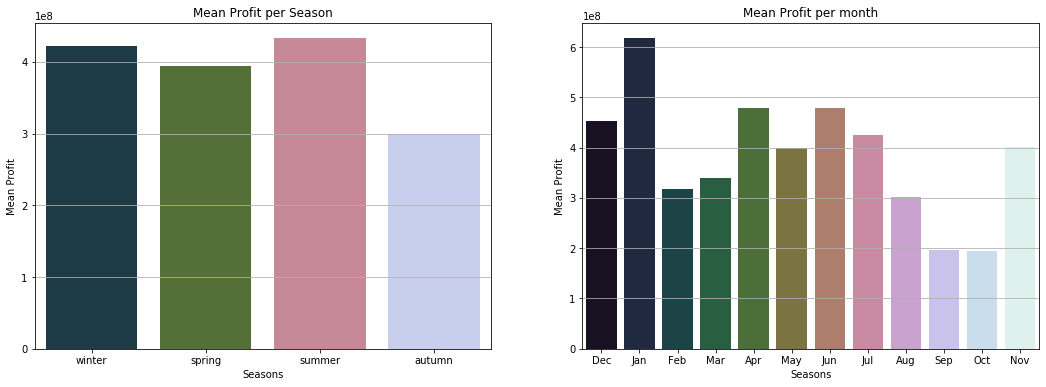

In [38]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(18,6))

chart1 = sns.barplot(ax = axis[0], x='seasons', y='profit', data=dfq4, palette='cubehelix')

chart2 = sns.barplot(ax = axis[1], x='cal_month', y='profit', data=dfq5, palette='cubehelix')

chart1.set(xlabel='Seasons',ylabel='Mean Profit', title='Mean Profit per Season')
chart1.grid(b=True, which='major', axis='y')
chart2.set(xlabel='Seasons',ylabel='Mean Profit', title='Mean Profit per month')
chart2.grid(b=True, which='major', axis='y')

plt.show()


Great! we have successfully plotted what we wanted but unfortunately we were not able to match the color bars. IT is still easy to make a link between the seasons and the months but it is not a direct relationship. As a solution we will try to create 4 subplots, one for each seasons. We will plot one season per plot (3 months = 3 bars), we will display them horizontally and make sure that the comparison axis (x in this case) has the same scale for all. 

In order to do this we will need 4 df, one for each month. So we will generate the first and then followed with thee plots.

In [57]:
winter = dfq5.loc[2:3,'cal_month':'profit']
winter.head()

,cal_month,worldwide_gross,profit
2,Dec,5.538020e+08,4.523912e+08
4,Jan,6.941935e+08,6.175269e+08
3,Feb,3.967387e+08,3.175959e+08


In [58]:
spring = dfq5.loc[7:8, 'cal_month':'profit']
spring.head()

,cal_month,worldwide_gross,profit
7,Mar,4.386969e+08,3.404315e+08
0,Apr,5.853458e+08,4.790958e+08
8,May,5.525705e+08,3.999705e+08


In [59]:
summer = dfq5.loc[6:1, 'cal_month':'profit']
summer.head()

,cal_month,worldwide_gross,profit
6,Jun,6.127839e+08,4.793589e+08
5,Jul,5.446898e+08,4.245864e+08
1,Aug,3.995056e+08,3.027329e+08


In [60]:
autumn = dfq5.loc[11:9, 'cal_month':'profit']
autumn.head()

,cal_month,worldwide_gross,profit
11,Sep,2.350326e+08,1.966040e+08
10,Oct,2.540227e+08,1.951477e+08
9,Nov,5.220153e+08,4.018300e+08


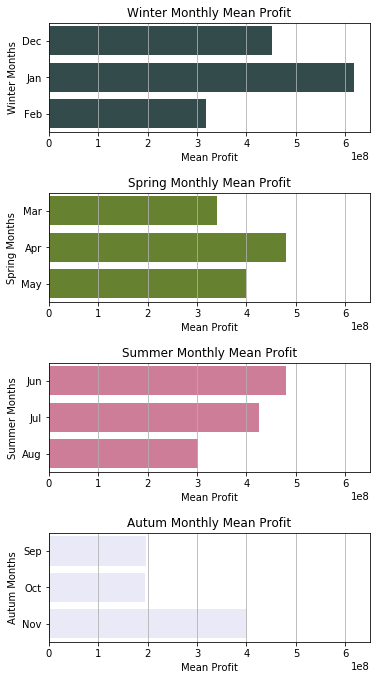

In [69]:
#Plots by seasons:

fig, axis = plt.subplots(nrows=4, ncols=1, figsize=(6,10))
fig.tight_layout(pad=4.0)

chart1 = sns.barplot(ax = axis[0], y='cal_month', x='profit', data=winter, orient='h', color='DarkSlateGray')
chart2 = sns.barplot(ax = axis[1], y='cal_month', x='profit', data=spring, orient='h', color='OliveDrab')
chart3 = sns.barplot(ax = axis[2], y='cal_month', x='profit', data=summer, orient='h', color='PaleVioletRed')
chart4 = sns.barplot(ax = axis[3], y='cal_month', x='profit', data=autumn, orient='h', color='Lavender')

# Subplots labeling:

chart1.set(xlabel='Mean Profit', ylabel='Winter Months', title='Winter Monthly Mean Profit')
chart1.grid(b=True, which='major', axis='x')
chart1.set_xlim(0, 6.5e+08)

chart2.set(xlabel='Mean Profit', ylabel='Spring Months', title='Spring Monthly Mean Profit')
chart2.grid(b=True, which='major', axis='x')
chart2.set_xlim(0, 6.5e+08)

chart3.set(xlabel='Mean Profit', ylabel='Summer Months', title='Summer Monthly Mean Profit')
chart3.grid(b=True, which='major', axis='x')
chart3.set_xlim(0, 6.5e+08)

chart4.set(xlabel='Mean Profit', ylabel='Autum Months', title='Autum Monthly Mean Profit')
chart4.grid(b=True, which='major', axis='x')
chart4.set_xlim(0, 6.5e+08)

plt.show()

Putting the last 4 plots vertically and on the same scale allows the viewer to rapidly identify which is the most profitable month to release movies. We will discuss this more below in the analysis

ANALYSIS

In order to address this question we created two sets of plots. A first set corresponding to a standard bar plot in SeaBorn with a subplot on the side. The left first plot shows the data by seasons, whereas the second by months. Unfortunately we didn't manage to set the same color bars, therefore as a solution, we created our second set of plots. This last one, consists of a 4x1 arrangement with each plot displaying the 3 months of each season. 

The reason why we did the 4 plots with a 4x1 arrangement is to allow the viewer to rapidly identify which bars are longer or shorter than others, thus where the most profitable months are for releasing movies.

We can interpret from the season plots that summer is in average the best time of the year to release movies, followed by the winter, spring and autumn, which is the least profitable, therefore the season to try to avoid. 

Of the entire year, the best month to focus on is January. We don't understand the reason since this is the beginning of the year, and we were expecting December to be at the top, when in fact is the forth best month. Maybe people concentrate more on doing their shopping and celebrating outside with family and friends, and aren't looking to staying indoors watching movies/TV. Still it is not a bad month to consider.

After January, June is our second best month. Right before the summer holidays seems to be a good time to release movies as well. 

Another interesting month is April, which corresponds to some of the European school holidays, and therefore has a good potential for high profitability. July is the fifth best, but as we go into the summer the profits start to slowly deepen, with the beginning of autumn hitting the worst time of the year (September and October).

Our recommendation is therefore to concentrate by months focusing on January, April, June and December, and if it sis too hard to be that detail focused, then aim for either the summer or winter as the best times to launch new titles